# Natural Language Processing - Text Summarization example

###### Links: [CNN DailyMail (HuggingFace)](https://huggingface.co/datasets/cnn_dailymail)  |  [Article ()]()

### 0 - Setup

###### Import pckgs

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

###### Import data

In [2]:
#import datasets
#dataset = datasets.load_dataset("cnn_dailymail", '3.0.0')

#lst_dics = [dic for dic in dataset["train"]]
#dtf = pd.DataFrame(lst_dics).rename(columns={"article":"text", "highlights":"y"})[["text","y"]].head(50000)
#dtf.to_csv("data_summary50.csv", index=False)
#dtf.head()

In [3]:
dtf = pd.read_csv("data_summary.csv")
dtf.head()

,text,y
0,Ad sales boost Time Warner profit Quarterly p...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech The dollar h...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim The owners ...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits British Air...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq Shares in U...,Pernod has reduced the debt it took on to fund...


In [4]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2214 non-null   object
 1   y       2214 non-null   object
dtypes: object(2)
memory usage: 34.7+ KB


In [5]:
# check
i = 1
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
Dollar gains on Greenspan speech  The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.  And Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He's taking a longer-term view, laying out a set of cond

### 1 - Text Analysis

- Text cleaning
- Word frequency
- Length analysis

###### Text cleaning

In [6]:
lst_stopwords = create_stopwords()
lst_stopwords = lst_stopwords + ["cnn","says","said","new","say"]

In [7]:
dtf = add_preprocessed_text(dtf, column="text", punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords)
dtf = add_preprocessed_text(dtf, column="y", punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords)
dtf.head()

,text,y,text_clean,y_clean
0,Ad sales boost Time Warner profit Quarterly p...,TimeWarner said fourth quarter sales rose 2% t...,ad sales boost time warner profit quarterly pr...,timewarner fourth quarter sales rose 2 111bn 1...
1,Dollar gains on Greenspan speech The dollar h...,The dollar has hit its highest level against t...,dollar gains greenspan speech dollar hit highe...,dollar hit highest level euro almost three mon...
2,Yukos unit buyer faces loan claim The owners ...,Yukos' owner Menatep Group says it will ask Ro...,yukos unit buyer faces loan claim owners embat...,yukos owner menatep group ask rosneft repay lo...
3,High fuel prices hit BA's profits British Air...,"Rod Eddington, BA's chief executive, said the ...",high fuel prices hit bas profits british airwa...,rod eddington bas chief executive results resp...
4,Pernod takeover talk lifts Domecq Shares in U...,Pernod has reduced the debt it took on to fund...,pernod takeover talk lifts domecq shares uk dr...,pernod reduced debt took fund seagram purchase...


In [8]:
# check
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
dollar gains greenspan speech dollar hit highest level euro almost three months federal reserve head us trade deficit set stabilise alan greenspan highlighted us governments willingness curb spending rising household savings factors may help reduce late trading york dollar reached 12871 euro 12974 thursday market concerns deficit hit greenback recent months friday federal reserve chairman mr greenspans speech london ahead meeting g7 finance ministers sent dollar higher earlier tumbled back worsethanexpected us jobs data think chairmans taking much sanguine view current account deficit hes taken time robert sinche head currency strategy bank america york hes taking longerterm view laying set conditions current account deficit improve year next worries deficit concerns china however remain chinas currency remains pegged dollar us currencys sharp falls recent months therefore made chinese export prices highly competitive calls shift beijings policy fallen deaf ears despi

###### Word frequency

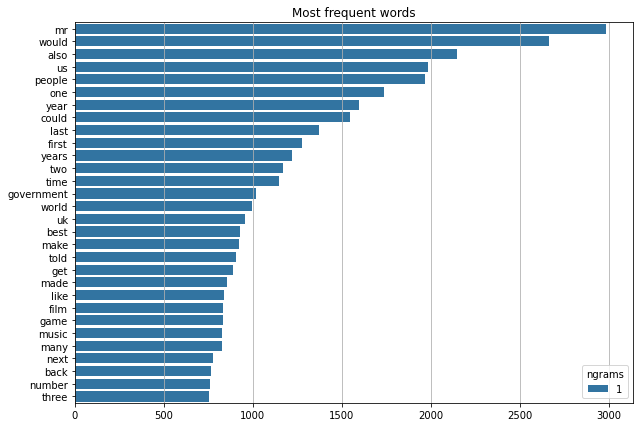

In [9]:
# Find most common words in text
dtf_freq = word_freq(corpus=dtf["text_clean"], ngrams=[1], top=30, figsize=(10,7))

In [10]:
thres = 5
X_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
X_top_words

9858

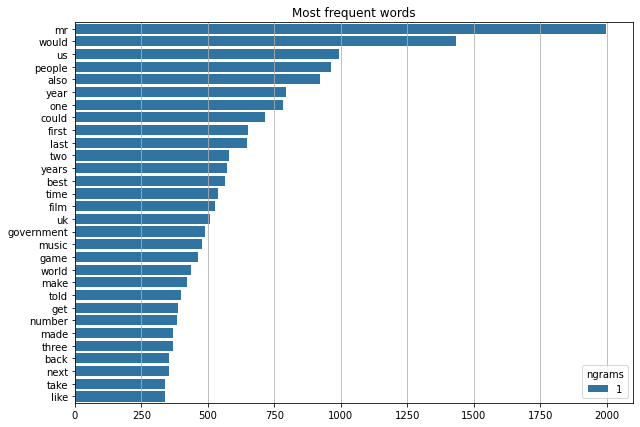

In [11]:
# Find most common words in summaries
dtf_freq = word_freq(corpus=dtf["y_clean"], ngrams=[1], top=30, figsize=(10,7))

In [12]:
thres = 5
y_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
y_top_words

5771

###### Length analysis

In [13]:
# Texts
X = add_text_length(dtf, "text_clean")

                            min         mean           max
char_count           296.000000  1340.710479  13988.000000
word_count            49.000000   217.623758   2201.000000
sentence_count         1.000000     1.000000      1.000000
avg_word_length        4.885906     6.149909      7.415966
avg_sentence_lenght   49.000000   217.623758   2201.000000


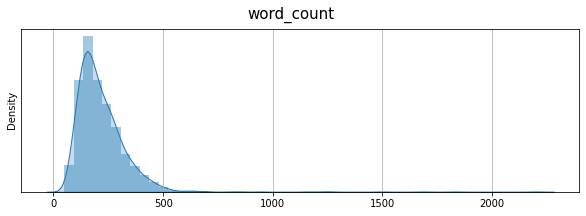

In [14]:
plot_distributions(X, x="word_count", figsize=(10,3))

In [15]:
X_avg_len = int(X["word_count"].mean())
X_avg_len

217

In [16]:
# Summaries
y = add_text_length(dtf, "y_clean")

                            min        mean          max
char_count           126.000000  601.886631  6904.000000
word_count            20.000000   97.965673  1091.000000
sentence_count         1.000000    1.000000     1.000000
avg_word_length        4.787879    6.143275     7.891892
avg_sentence_lenght   20.000000   97.965673  1091.000000


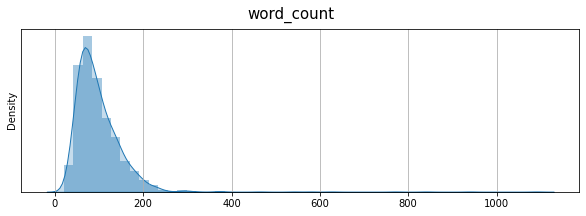

In [17]:
plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))

In [18]:
y_avg_len = int(y["word_count"].mean())
y_avg_len

97

min     0.159341
mean    0.449893
max     0.708661
Name: ratio, dtype: float64


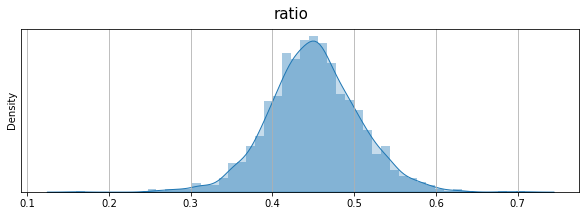

In [19]:
# Ratio summary / text
y["ratio"] = y["word_count"] / X["word_count"]
print(y["ratio"].describe().T[["min","mean","max"]])

plot_distributions(y, x="ratio", figsize=(10,3))

In [20]:
ratio = y["ratio"].mean()
ratio

0.44989337989758454

###### Summary

In [21]:
dtf = dtf[["text","text_clean","y","y_clean"]]
dtf.head()

,text,text_clean,y,y_clean
0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...,timewarner fourth quarter sales rose 2 111bn 1...
1,Dollar gains on Greenspan speech The dollar h...,dollar gains greenspan speech dollar hit highe...,The dollar has hit its highest level against t...,dollar hit highest level euro almost three mon...
2,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim owners embat...,Yukos' owner Menatep Group says it will ask Ro...,yukos owner menatep group ask rosneft repay lo...
3,High fuel prices hit BA's profits British Air...,high fuel prices hit bas profits british airwa...,"Rod Eddington, BA's chief executive, said the ...",rod eddington bas chief executive results resp...
4,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares uk dr...,Pernod has reduced the debt it took on to fund...,pernod reduced debt took fund seagram purchase...


### 2 - Preprocessing

In [22]:
# Partitioning
dtf_train = dtf.copy().iloc[i+1:]
dtf_test = dtf.copy().iloc[:i+1]
dtf_test

,text,text_clean,y,y_clean
0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...,timewarner fourth quarter sales rose 2 111bn 1...
1,Dollar gains on Greenspan speech The dollar h...,dollar gains greenspan speech dollar hit highe...,The dollar has hit its highest level against t...,dollar hit highest level euro almost three mon...


### 3 - Baseline (Extractive: TextRank)

In [24]:
# Test (no Train)
predicted = textrank(corpus=dtf_test["text"], ratio=ratio)

In [25]:
# Evaluate
evaluate_summary(dtf_test["y"][i], predicted[i])

rouge1: 0.9 | rouge2: 0.85 | rougeL: 0.85 --> avg rouge: 0.88


In [26]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y"][i], predicted[i], both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [27]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 4 - Model (Abstractive: Seq2Seq)

###### Features Engineering

--- tokenization ---
9859 words
--- padding to sequence ---
2212 sequences of length 217


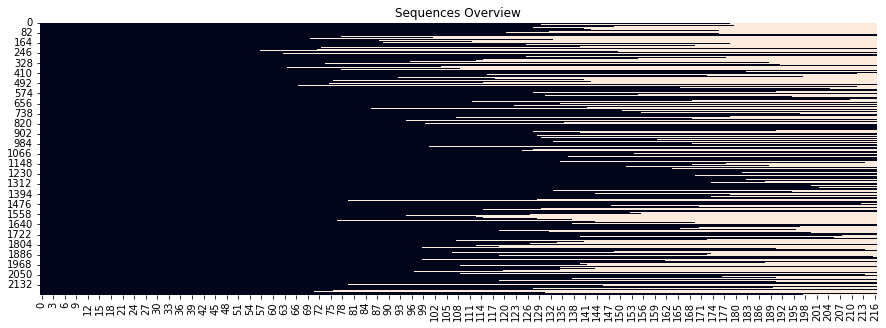

In [23]:
# Create X_train for seq2seq (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], top=X_top_words, maxlen=X_avg_len)

X_train, X_tokenizer, X_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

--- tokenization ---
--- padding to sequence ---
2 sequences of length 217


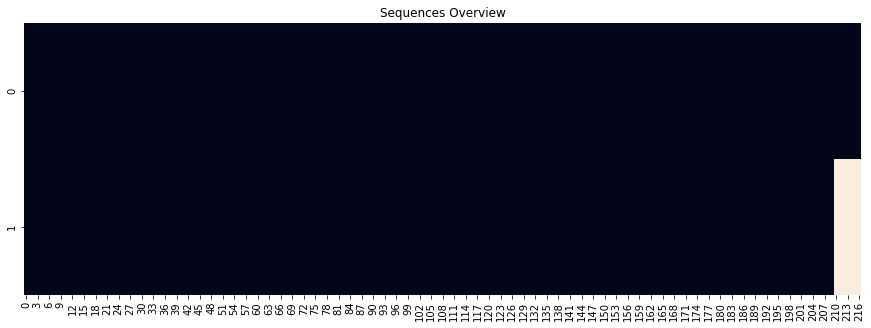

In [24]:
# Preprocess X_test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], fitted_tokenizer=X_tokenizer, maxlen=X_train.shape[1])

In [25]:
# Add START and END tokens to the summaries (y)
special_tokens = ("<START>", "<END>")
dtf_train["y_clean"] = dtf_train['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"] = dtf_test['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"][i]

'<START> dollar hit highest level euro almost three months federal reserve head us trade deficit set stabilise chinas currency remains pegged dollar us currencys sharp falls recent months therefore made chinese export prices highly competitive market concerns deficit hit greenback recent monthsi think chairmans taking much sanguine view current account deficit hes taken time robert sinche head currency strategy bank america york recent falls partly result big budget deficits well uss yawning current account gap need funded buying us bonds assets foreign firms governmentshes taking longerterm view laying set conditions current account deficit improve year next <END>'

--- tokenization ---
5772 words
--- padding to sequence ---
2212 sequences of length 97


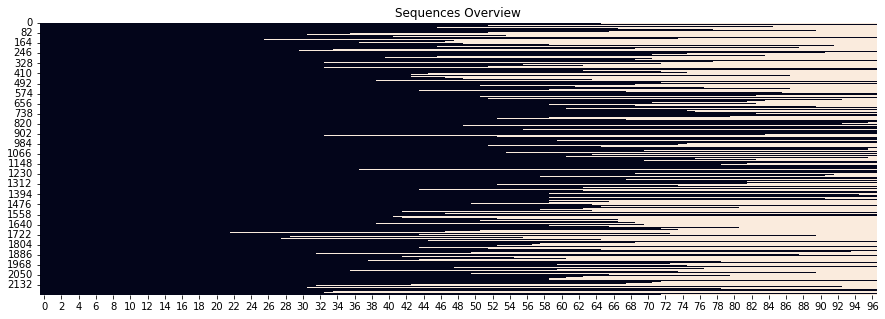

In [26]:
# Tokenize the summaries (y_train)
dic_seq = text2seq(corpus=dtf_train["y_clean"], top=y_top_words, maxlen=y_avg_len)

y_train, y_tokenizer, y_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

--- tokenization ---
--- padding to sequence ---
2 sequences of length 97


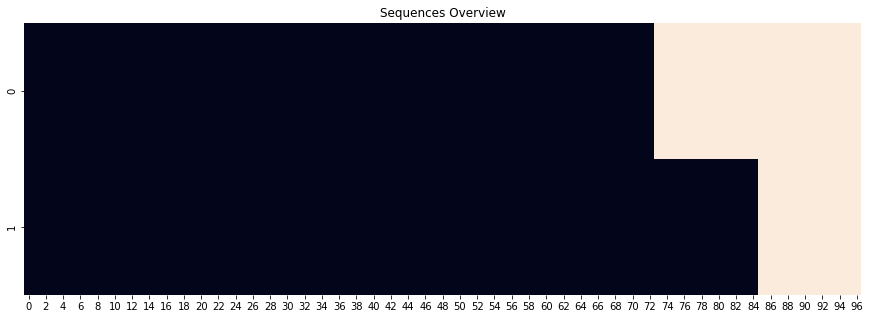

In [27]:
# Preprocess y_test with the same tokenizer
y_test = text2seq(corpus=dtf_test["y_clean"], fitted_tokenizer=y_tokenizer, maxlen=y_train.shape[1])

###### Create Embedding Weights

In [28]:
# Load pre-trained Word2Vec
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [29]:
# Or train Word2Vec from scratch
#corpus =  dtf_train["text_clean"].append(dtf_train["y_clean"])
#lst_corpus, nlp = fit_w2v(corpus=corpus, min_count=1, size=300, window=y_avg_len)

In [30]:
# check nlp model
word = "home"
nlp[word].shape

(300,)

In [31]:
X_embeddings = vocabulary_embeddings(X_dic_vocabulary, nlp)
X_embeddings.shape

vocabulary mapped to 9860 vectors of size 300


(9860, 300)

In [32]:
y_embeddings = vocabulary_embeddings(y_dic_vocabulary, nlp)
y_embeddings.shape

vocabulary mapped to 5773 vectors of size 300


(5773, 300)

###### Model Design

In [33]:
# Simple Seq2Seq
lstm_units = 250

##------------ ENCODER (embedding + lstm) ------------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, dropout=0.2, return_sequences=True, return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)

##------------ DECODER (embedding + lstm + dense) ---------------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, dropout=0.2, return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=y_embeddings.shape[0], activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE -------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 217)]        0                                            
__________________________________________________________________________________________________
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 217, 300)     2958000     x_in[0][0]                       
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    1731900     y_in[0][0]                       
____________________________________________________________________________________________

In [91]:
# Seq2Seq with Embedding + Bi-LSTM + Attention layers
lstm_units = 250

##------------ ENCODER (embedding + 3 lstm) ------------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### bi-lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### bi-lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### bi-lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (embedding + lstm + attention + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### attention
#x = layers.Attention()([x_out, y_out])
#merge = layers.Concatenate(name='merge', axis=-1)([y_out, y_emb])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=y_embeddings.shape[0], activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE ----------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, None, 500), dtype=tf.float32, name=None), name='y_lstm/PartitionedCall:1', description="created by layer 'y_lstm'")
Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 217)]        0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 217, 300)     2958000     x_in[0][0]                       
__________________________________________________________________________________________________
x_lstm_1 (Bidirectional)        [(None, 217, 500), ( 1102000     x_emb[0][0]                      
__________________________________________________________________________________________________
x_lstm_2 (Bidirectional)     

In [64]:
import tensorflow as tf
tf.pad(x, tf.constant([[0,0],[0,3],[0,0]]), "CONSTANT")

<tf.Tensor: shape=(1, 5, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])>

In [90]:
# Seq2Seq with Embedding + Bi-LSTM + Attention layers
lstm_units = 250

##------------ ENCODER (embedding + 3 lstm) ------------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### bi-lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### bi-lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### bi-lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (embedding + lstm + attention + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])

### attention
layer_attention = layers.Attention(name='attention')
attention = layer_attention([x_out, y_out])
ttt = tf.pad(y_out, tf.constant([[0,0],[0,217-96],[0,0]]), "CONSTANT")
merge = layers.Concatenate(name='merge')([y_out, attention])
merge = layers.Concatenate(name='merge')([ttt, attention])
print(merge)

### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=y_embeddings.shape[0], activation='softmax'))
y_out = layer_dense(merge)

##---------------------------- COMPILE ----------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 217, 1000), dtype=tf.float32, name=None), name='merge/concat:0', description="created by layer 'merge'")
Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 217)]        0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 217, 300)     2958000     x_in[0][0]                       
__________________________________________________________________________________________________
x_lstm_1 (Bidirectional)        [(None, 217, 500), ( 1102000     x_emb[0][0]                      
__________________________________________________________________________________________________
x_lstm_2 (Bidirectional)        [(None, 

###### Train

In [82]:
# This takes a while
model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, build_encoder_decoder=False, 
                    epochs=1, batch_size=128, verbose=1)
#model, encoder_model, decoder_model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
#                                                  build_encoder_decoder=True, epochs=10, batch_size=64)

ValueError: in user code:

    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\engine\training.py:792 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\engine\compile_utils.py:457 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\utils\metrics_utils.py:73 decorated
        update_op = update_state_fn(*args, **kwargs)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\metrics.py:177 update_state_fn
        return ag_update_state(*args, **kwargs)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\metrics.py:681 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\keras\metrics.py:3537 sparse_categorical_accuracy
        return tf.cast(tf.equal(y_true, y_pred), backend.floatx())
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\ops\math_ops.py:1864 equal
        return gen_math_ops.equal(x, y, name=name)
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:3216 equal
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\profili\U382270\Downloads\my\anaconda\envs\env1\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 96 and 217 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](Squeeze, Cast_2)' with input shapes: [?,96], [?,217].


###### Test

In [43]:
# Prediction Encoder
encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
encoder_model.summary()

Model: "Prediction_Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 217)]        0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 217, 300)     2958000     x_in[0][0]                       
__________________________________________________________________________________________________
attention (Attention)           (None, 217, 300)     0           x_emb[0][0]                      
                                                                 x_emb[0][0]                      
__________________________________________________________________________________________________
x_lstm_1 (Bidirectional)        [(None, 217, 500), ( 1102000     attention[0][0] 

In [90]:
# Prediction Decoder
## double the lstm units if you used bidirectional lstm
lstm_units = lstm_units*2 if any("Bidirectional" in str(layer) for layer in model.layers) else lstm_units

## states of the previous time step
x_out2 = layers.Input(shape=(X_train.shape[1], lstm_units))
state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))

## decoder embeddings
y_emb2 = layer_y_emb(y_in)

## lstm to predict the next word
y_out2, new_state_h, new_state_c = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])

## attention
if any("Attention" in str(layer) for layer in model.layers):
    attention = layer_attention([x_out2, y_out2])
    merge = layers.Concatenate(name='merge', axis=-1)([y_out2, attention])

## softmax to generate probability distribution over the target vocabulary
probs = layer_dense(y_out2)

## compile
decoder_model = models.Model(inputs=[y_in, x_out2, state_h, state_c], 
                             outputs=[probs, new_state_h, new_state_c],
                             name="Prediction_Decoder")
decoder_model.summary()

250
500
Model: "Prediction_Decoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    1731900     y_in[0][0]                       
__________________________________________________________________________________________________
input_53 (InputLayer)           [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_54 (InputLayer)           [(None, 500)]        0                                            
_________________________________________________________________________

In [91]:
predicted = predict_seq2seq(X_test, encoder_model, decoder_model, y_tokenizer, special_tokens)

In [92]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][i], predicted[i])

rouge1: 0.0 | rouge2: 0.0 | rougeL: 0.0 --> avg rouge: 0.0


In [93]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][i], predicted[i], both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [94]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 5 - Model (Abstractive: Language model)

In [96]:
# Test (no Train)
predicted = bart(corpus=[dtf_test["text"]], ratio=ratio)
predicted = predicted[0]

In [97]:
# Evaluate
evaluate_summary(y_test, predicted)

rouge1: 0.39 | rouge2: 0.15 | rougeL: 0.15 --> avg rouge: 0.31


In [98]:
# Compare y_test and predicted
match = display_string_matching(y_test, predicted, both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [99]:
# Explainability
match = display_string_matching(dtf_test["text_clean"], predicted, both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))